In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
df = pd.DataFrame()
dirs = ['s', 'f', 'n', 'o', 'z']
for i in range(5):
    directory = f'/kaggle/input/bonn-university-eeg-data/{dirs[i]}/{dirs[i].upper()}'
    for filename in os.listdir(directory):
        temp_df = pd.read_csv(f'{directory}/{filename}', names = ['Values'])
        df = pd.concat([df, temp_df], axis = 1, ignore_index=True)

In [3]:
df = df.T

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,-224,-334,-411,-436,-449,-387,-257,-41,320,656,...,182,188,219,268,334,386,405,380,294,32
1,-358,-378,-365,-338,-296,-282,-274,-261,-222,-168,...,-308,-262,-204,-133,-55,12,51,50,34,62
2,401,577,667,669,604,488,356,223,97,-20,...,-99,-63,-41,-40,-60,-79,-100,-94,-77,-202
3,-459,-778,-981,-1048,-734,-183,478,1040,1381,1502,...,-1,2,1,-3,-8,-6,-3,-8,-11,949
4,-501,-540,-523,-489,-539,-768,-998,-1156,-1009,-665,...,825,911,914,849,763,637,521,418,345,-230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-64,-62,-59,-62,-61,-65,-70,-69,-54,-37,...,-45,-27,-12,-8,-4,-5,-10,-30,-41,-93
496,-20,-12,-6,6,8,-2,-22,-39,-39,-49,...,1,7,20,19,11,10,12,9,2,-14
497,20,27,-5,-32,-38,-1,41,65,73,49,...,39,39,43,31,-12,-73,-114,-111,-71,-9
498,14,25,31,36,33,33,27,27,21,24,...,-6,-7,-2,-20,-34,-40,-40,-26,-28,21


In [5]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

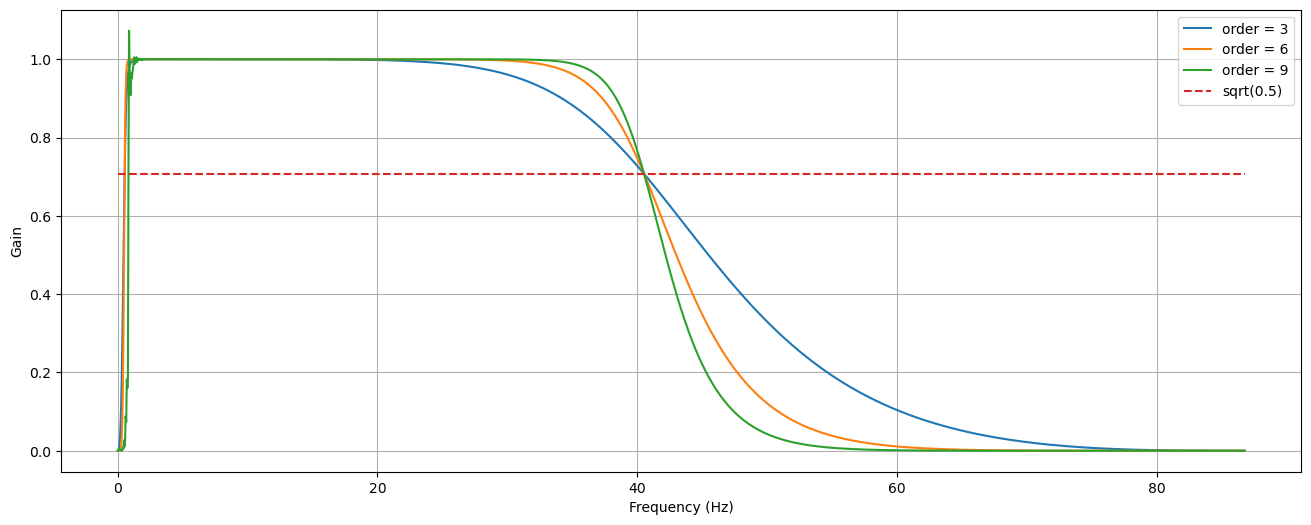

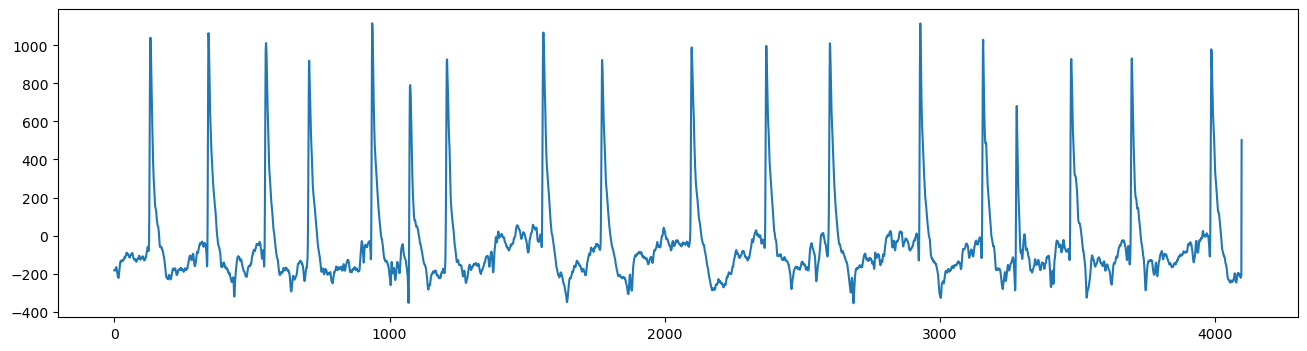

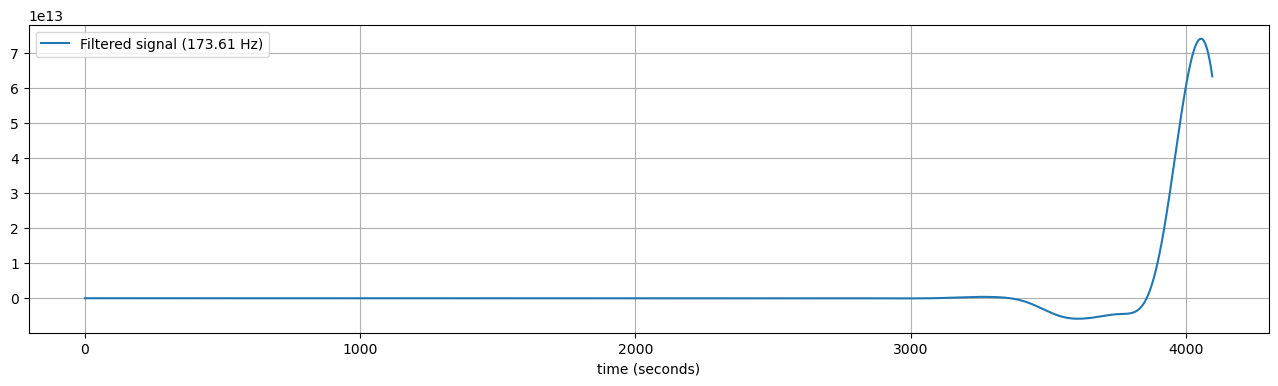

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 173.61
lowcut = 0.53
highcut = 40.53

# Plot the frequency response for a few different orders.
plt.figure(1, figsize = (16, 6))
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, fs=fs, worN=2000)
    plt.plot(w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure(2, figsize = (16, 4))
plt.clf()
plt.plot(df.iloc[100, :], label='Noisy signal')

plt.figure(3, figsize = (16, 4))
y = butter_bandpass_filter(df.iloc[100, :], lowcut, highcut, fs, order=9)
plt.plot(y, label='Filtered signal (%g Hz)' % fs)
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

In [13]:
fs = 173.61
lowcut = 0.53
highcut = 40
filt_df = pd.DataFrame()
for i in range(500):
    y = butter_bandpass_filter(df.iloc[i, :], lowcut, highcut, fs, order = 7)
    temp_df = pd.DataFrame(y)
    filt_df = pd.concat([filt_df, temp_df], axis = 1, ignore_index = True)

In [15]:
filt_df = filt_df.T

In [16]:
filt_df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,-2.200938,-19.790704,-80.698642,-197.501152,-324.622165,-383.434147,-347.783953,-261.403737,-154.584301,6.006994,...,235.826054,171.906192,142.864865,137.909052,140.278373,151.044858,180.332200,219.637205,239.549208,212.967999
1,-3.517570,-30.098920,-114.623132,-254.413305,-361.068041,-338.425818,-215.993764,-119.661251,-106.270283,-114.049884,...,-529.564201,-547.068276,-525.502249,-475.394343,-400.833495,-313.841797,-229.689025,-157.316577,-103.139375,-76.944646
2,3.940072,35.223346,142.247545,342.538209,547.004556,611.471605,498.336031,313.877355,160.510871,35.103856,...,-166.180970,-175.213229,-142.571205,-94.321235,-53.324558,-32.416071,-33.803515,-49.924272,-66.884311,-72.863796
3,-4.509958,-41.472933,-173.622376,-438.197524,-742.656450,-882.097234,-710.315525,-252.349834,353.443367,946.592612,...,87.154615,41.138418,28.957927,32.029194,36.039636,35.019745,30.143236,26.009008,25.768045,37.098499
4,-4.922634,-42.229864,-161.339792,-359.651375,-514.727587,-498.047226,-374.033787,-356.005343,-529.387483,-730.874643,...,543.325001,829.304593,1015.585546,1091.225105,1055.318164,933.876621,771.750868,601.429502,433.643044,271.647487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.628839,-5.326031,-20.018950,-43.741059,-61.167813,-57.597775,-40.767517,-31.839218,-36.200506,-39.233471,...,4.573625,15.333665,30.134984,44.646921,55.947697,62.406726,62.808524,57.286019,47.428587,33.595910
496,-0.196512,-1.591921,-5.590173,-10.789592,-11.279914,-3.039680,7.902219,9.357769,-3.635680,-23.006573,...,-20.614393,-36.439672,-46.631943,-45.590309,-36.571617,-27.629224,-25.326600,-29.840983,-34.854051,-35.237778
497,0.196512,1.739305,6.587602,13.208528,12.226873,-5.054917,-28.607659,-31.033830,1.729121,48.334460,...,-2.386665,19.772633,40.808176,46.066698,36.245320,21.460439,2.023183,-32.626250,-79.390816,-109.087669
498,0.137559,1.277450,5.399879,13.779736,23.787855,29.675317,28.362193,22.543053,16.693740,12.273330,...,10.012779,29.587732,48.311630,59.245527,61.134602,53.919570,39.286411,24.135657,17.590352,22.958340


In [ ]:
filt_df.to_csv("filt.csv")

<AxesSubplot:title={'center':'EEG from Healthy Part of the Brain'}>

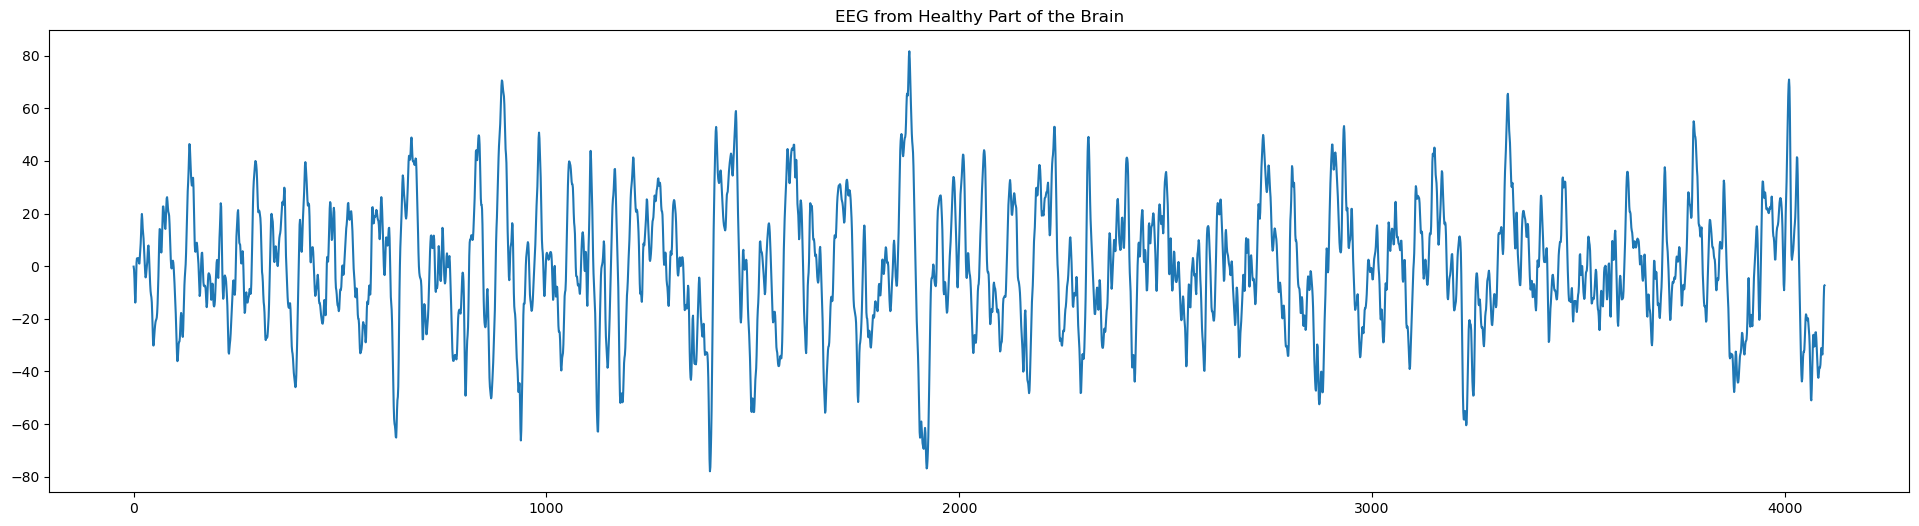

In [17]:
row3 = filt_df.iloc[200, :]
row3.plot(figsize=(24,6), title = 'EEG from Healthy Part of the Brain')

<AxesSubplot:title={'center':'EEG from Healthy Part of the Brain'}>

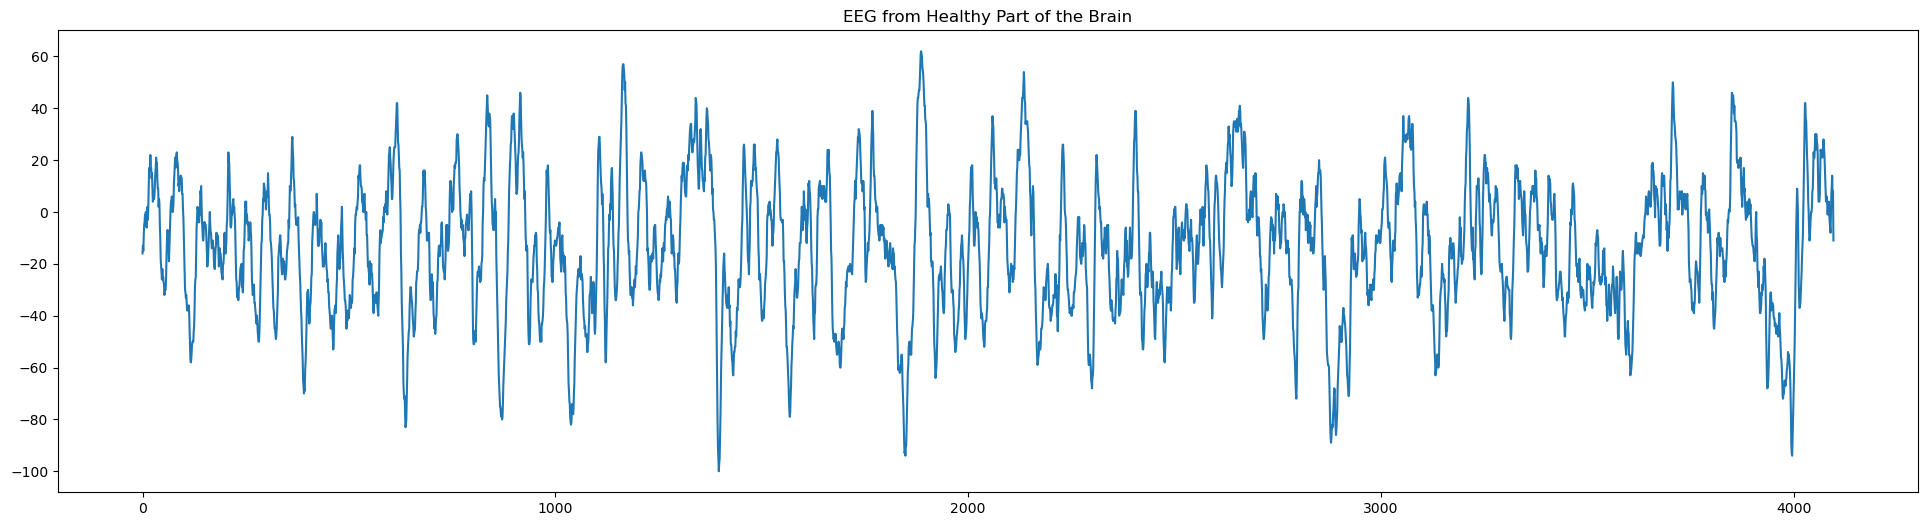

In [18]:
row = df.iloc[200, :]
row.plot(figsize=(24,6), title = 'EEG from Healthy Part of the Brain')

In [23]:
import pickle
pickle.dump(filt_df, open('filt10.pkl', 'wb'))

In [24]:
filt_signals = pickle.load(open('filt10.pkl','rb'))

In [25]:
filt_signals

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,-2.200938,-19.790704,-80.698642,-197.501152,-324.622165,-383.434147,-347.783953,-261.403737,-154.584301,6.006994,...,235.826054,171.906192,142.864865,137.909052,140.278373,151.044858,180.332200,219.637205,239.549208,212.967999
1,-3.517570,-30.098920,-114.623132,-254.413305,-361.068041,-338.425818,-215.993764,-119.661251,-106.270283,-114.049884,...,-529.564201,-547.068276,-525.502249,-475.394343,-400.833495,-313.841797,-229.689025,-157.316577,-103.139375,-76.944646
2,3.940072,35.223346,142.247545,342.538209,547.004556,611.471605,498.336031,313.877355,160.510871,35.103856,...,-166.180970,-175.213229,-142.571205,-94.321235,-53.324558,-32.416071,-33.803515,-49.924272,-66.884311,-72.863796
3,-4.509958,-41.472933,-173.622376,-438.197524,-742.656450,-882.097234,-710.315525,-252.349834,353.443367,946.592612,...,87.154615,41.138418,28.957927,32.029194,36.039636,35.019745,30.143236,26.009008,25.768045,37.098499
4,-4.922634,-42.229864,-161.339792,-359.651375,-514.727587,-498.047226,-374.033787,-356.005343,-529.387483,-730.874643,...,543.325001,829.304593,1015.585546,1091.225105,1055.318164,933.876621,771.750868,601.429502,433.643044,271.647487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.628839,-5.326031,-20.018950,-43.741059,-61.167813,-57.597775,-40.767517,-31.839218,-36.200506,-39.233471,...,4.573625,15.333665,30.134984,44.646921,55.947697,62.406726,62.808524,57.286019,47.428587,33.595910
496,-0.196512,-1.591921,-5.590173,-10.789592,-11.279914,-3.039680,7.902219,9.357769,-3.635680,-23.006573,...,-20.614393,-36.439672,-46.631943,-45.590309,-36.571617,-27.629224,-25.326600,-29.840983,-34.854051,-35.237778
497,0.196512,1.739305,6.587602,13.208528,12.226873,-5.054917,-28.607659,-31.033830,1.729121,48.334460,...,-2.386665,19.772633,40.808176,46.066698,36.245320,21.460439,2.023183,-32.626250,-79.390816,-109.087669
498,0.137559,1.277450,5.399879,13.779736,23.787855,29.675317,28.362193,22.543053,16.693740,12.273330,...,10.012779,29.587732,48.311630,59.245527,61.134602,53.919570,39.286411,24.135657,17.590352,22.958340


<AxesSubplot:title={'center':'EEG from Healthy Part of the Brain'}>

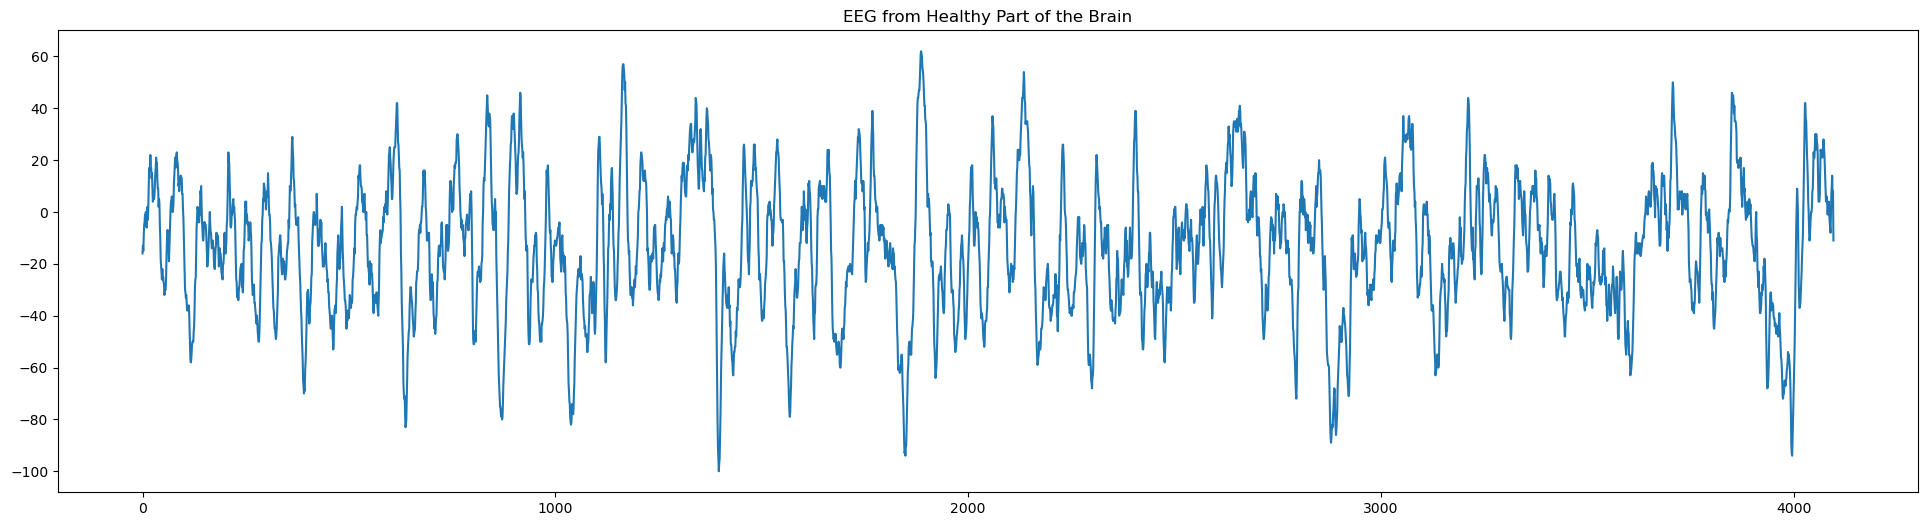

In [26]:
roww = df.iloc[200, :]
roww.plot(figsize=(24,6), title = 'EEG from Healthy Part of the Brain')